In [1]:
# import needed libraries
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
# read a csv file
salary_df = pd.read_csv('Salary_Data.csv')
salary_df.head()

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,Male,Master's,Director,20.0,200000.0


In [3]:
# get a quick info about dataset 
salary_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6704 entries, 0 to 6703
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  6702 non-null   float64
 1   Gender               6702 non-null   object 
 2   Education Level      6701 non-null   object 
 3   Job Title            6702 non-null   object 
 4   Years of Experience  6701 non-null   float64
 5   Salary               6699 non-null   float64
dtypes: float64(3), object(3)
memory usage: 314.4+ KB


## Data preprocessing Part 1

In [4]:
# detecting the null values
salary_df.isnull().sum()

Age                    2
Gender                 2
Education Level        3
Job Title              2
Years of Experience    3
Salary                 5
dtype: int64

In [5]:
# drop the null values
salary_df.dropna(inplace = True)

In [6]:
# description of data
salary_df.describe()

,Age,Years of Experience,Salary
count,6698.000000,6698.000000,6698.000000
mean,33.623022,8.095178,115329.253061
std,7.615784,6.060291,52789.792507
min,21.000000,0.000000,350.000000
25%,28.000000,3.000000,70000.000000
50%,32.000000,7.000000,115000.000000
75%,38.000000,12.000000,160000.000000
max,62.000000,34.000000,250000.000000


In [7]:
# checking the unique values of job title
salary_df['Job Title'].unique()

array(['Software Engineer', 'Data Analyst', 'Senior Manager',
       'Sales Associate', 'Director', 'Marketing Analyst',
       'Product Manager', 'Sales Manager', 'Marketing Coordinator',
       'Senior Scientist', 'Software Developer', 'HR Manager',
       'Financial Analyst', 'Project Manager', 'Customer Service Rep',
       'Operations Manager', 'Marketing Manager', 'Senior Engineer',
       'Data Entry Clerk', 'Sales Director', 'Business Analyst',
       'VP of Operations', 'IT Support', 'Recruiter', 'Financial Manager',
       'Social Media Specialist', 'Software Manager', 'Junior Developer',
       'Senior Consultant', 'Product Designer', 'CEO', 'Accountant',
       'Data Scientist', 'Marketing Specialist', 'Technical Writer',
       'HR Generalist', 'Project Engineer', 'Customer Success Rep',
       'Sales Executive', 'UX Designer', 'Operations Director',
       'Network Engineer', 'Administrative Assistant',
       'Strategy Consultant', 'Copywriter', 'Account Manager',
      

In [8]:
# checking the value counts 
salary_df['Job Title'].value_counts()

Software Engineer             518
Data Scientist                453
Software Engineer Manager     376
Data Analyst                  363
Senior Project Engineer       318
                             ... 
Account Manager                 1
Help Desk Analyst               1
Senior Training Specialist      1
Junior Web Designer             1
Software Project Manager        1
Name: Job Title, Length: 191, dtype: int64

In [9]:
# creating the variable for reducing the number of job titles
job_title_stats = salary_df['Job Title'].value_counts()
job_title_stats_less_than_50 = job_title_stats[job_title_stats<=50]
job_title_stats_less_than_50.count()

153

In [10]:
# reducing the number of job titles
salary_df['Job Title'] = salary_df['Job Title'].apply(lambda x: 'Others' if x in job_title_stats_less_than_50 else x )
salary_df['Job Title'].nunique()

39

In [11]:
# checking unique values in education level 
salary_df['Education Level'].unique()

array(["Bachelor's", "Master's", 'PhD', "Bachelor's Degree",
       "Master's Degree", 'High School', 'phD'], dtype=object)

In [12]:
salary_df['Education Level'].replace(["Bachelor's Degree","Master's Degree","phD"],["Bachelor's","Master's","PhD"],inplace=True)

In [13]:
salary_df.Gender.value_counts()
# three genders present in this dataset

Male      3671
Female    3013
Other       14
Name: Gender, dtype: int64

## Exploratory data analysis

In [14]:
salary_df.head()

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Others,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,Male,Master's,Others,20.0,200000.0


## Distribution of catogorical variables

<Axes: xlabel='Education Level', ylabel='count'>

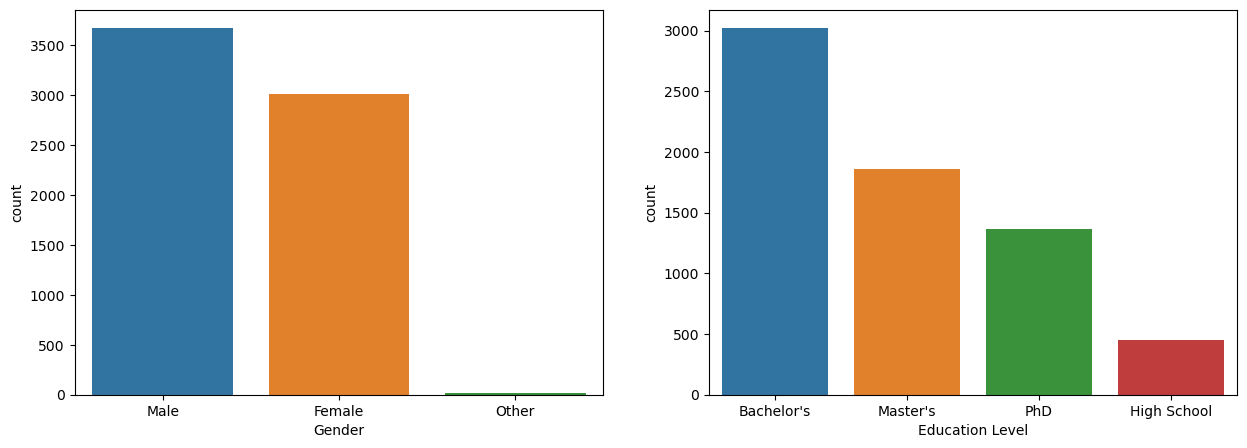

In [15]:
fig, ax = plt.subplots(1,2,figsize=(15,5))
sns.countplot(x='Gender',data=salary_df,ax = ax[0])
sns.countplot(x='Education Level',data = salary_df,ax=ax[1])

The first chart reveals that a significant portion of the employees are males, while the second chart indicates that the majority of employees have completed a bachelor's degree.

## Distribution of Continuous variables 

<Axes: xlabel='Salary', ylabel='Count'>

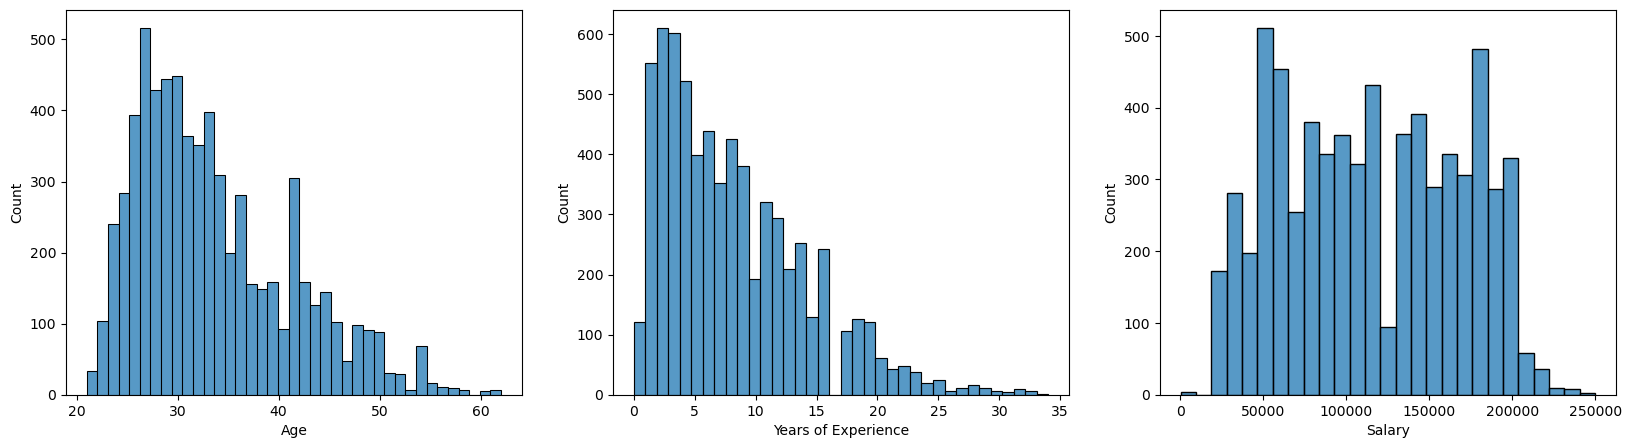

In [16]:
fig, ax = plt.subplots(1,3,figsize=(20,5))
sns.histplot(salary_df['Age'],ax=ax[0])
sns.histplot(salary_df['Years of Experience'],ax=ax[1])
sns.histplot(salary_df['Salary'],ax=ax[2])

<p>Chart 1 highlights that the majority of employees fall within the 23 to 37 years age range, emphasizing a youthful workforce.</p>

<p>The second chart illustrates employees experience levels with the majority having 1 to 10 years of experience.</p>

<p>The third chart demontrates the salary distribution with most employees earning salaries between 50,000 to 2,00,000.</p>

## Top 10 Highest paid jobs 

[Text(0.5, 1.0, 'Top 10 Highest paid jobs')]

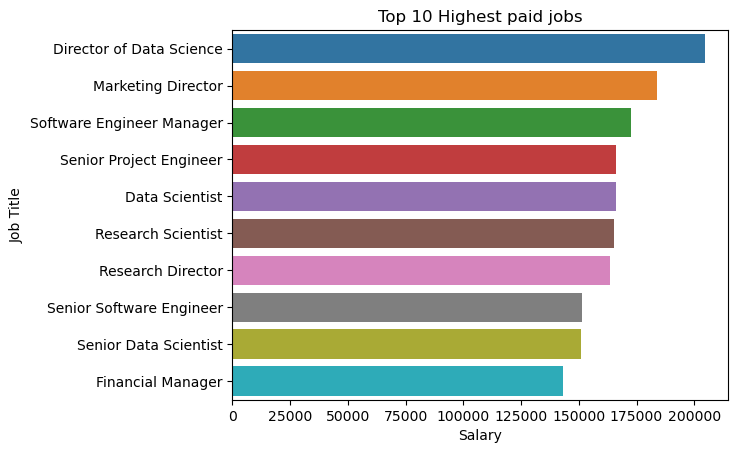

In [17]:
mean_salary_by_job = salary_df.groupby('Job Title')['Salary'].mean().reset_index()
sorted_data = mean_salary_by_job.sort_values(by='Salary',ascending=False)
sns.barplot(x='Salary',y='Job Title',data=sorted_data.head(10)).set(title='Top 10 Highest paid jobs')

Based on this chart we can know Director of data science gets a highest mean salary

## Relationship with Target variable

[Text(0.5, 1.0, 'Relationship between Education Level and Salary')]

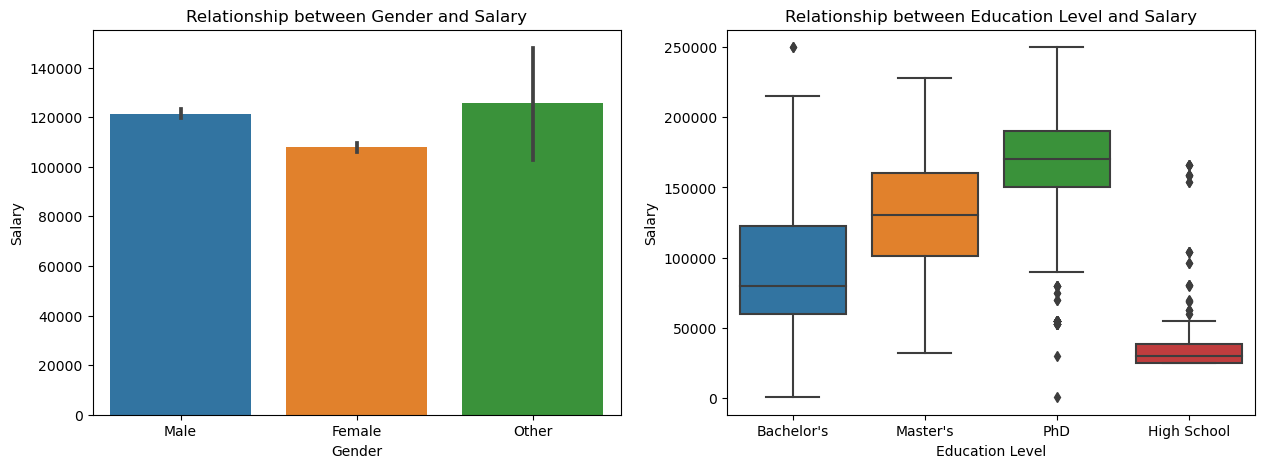

In [18]:
fig, ax = plt.subplots(1,2,figsize=(15,5))
sns.barplot(x='Gender',y='Salary',data=salary_df,ax=ax[0]).set(title='Relationship between Gender and Salary')
sns.boxplot(x='Education Level',y='Salary',data=salary_df,ax=ax[1]).set(title='Relationship between Education Level and Salary')

<p>In chart 1 demonstrates the salary distribution among the genders. Employees from the other genders get a high salary as compared to the other two genders, but they are very less in count.</p>
<p>Through chart second we can ascertain PhD holders have a high median salary</p> 

## Detecting the Outliers

In [19]:
# detecting the outliers in salary column using IQR method
Q1 = salary_df.Salary.quantile(0.25)
Q3 = salary_df.Salary.quantile(0.75)
IQR = Q3-Q1
lower = Q1-1.5*IQR
upper = Q3+1.5*IQR

In [20]:
salary_df[salary_df.Salary>upper]

,Age,Gender,Education Level,Job Title,Years of Experience,Salary


In [21]:
salary_df[salary_df.Salary<lower]

,Age,Gender,Education Level,Job Title,Years of Experience,Salary


No outliers found in Salary column

In [22]:
# detecting the outliers in experience column using IQR method
Q1 = salary_df['Years of Experience'].quantile(0.25)
Q3 = salary_df['Years of Experience'].quantile(0.75)
IQR = Q3-Q1
lower = Q1-1.5*IQR
upper = Q3+1.5*IQR

In [23]:
salary_df[salary_df['Years of Experience']>upper]

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
2378,53.0,Other,High School,Senior Project Engineer,31.0,166109.0
2387,57.0,Female,PhD,Full Stack Engineer,30.0,121450.0
2392,52.0,Female,Master's,Senior Software Engineer,28.0,186963.0
2396,60.0,Female,PhD,Software Engineer Manager,33.0,179180.0
2398,58.0,Male,Master's,Senior Software Engineer,27.0,190004.0
...,...,...,...,...,...,...
3076,52.0,Male,PhD,Software Engineer Manager,26.0,185982.0
3084,54.0,Female,PhD,Software Engineer Manager,32.0,191510.0
3104,54.0,Male,PhD,Software Engineer Manager,30.0,184660.0
3120,54.0,Male,PhD,Software Engineer Manager,28.0,182013.0


In [24]:
salary_df[salary_df['Years of Experience']<lower]

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
